<a href="https://colab.research.google.com/github/sohaillagha/irisnn/blob/main/irisperceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Prediction      Actual
0    Virginica   Virginica
1   Versicolor  Versicolor
2       Setosa      Setosa
3    Virginica   Virginica
4       Setosa      Setosa
5    Virginica   Virginica
6       Setosa      Setosa
7    Virginica  Versicolor
8    Virginica  Versicolor
9   Versicolor  Versicolor
10  Versicolor   Virginica
11   Virginica  Versicolor
12  Versicolor  Versicolor
13   Virginica  Versicolor
14  Versicolor  Versicolor
15      Setosa      Setosa
16  Versicolor  Versicolor
17  Versicolor  Versicolor
18      Setosa      Setosa
19      Setosa      Setosa
20   Virginica   Virginica
21  Versicolor  Versicolor
22      Setosa      Setosa
23      Setosa      Setosa
24   Virginica   Virginica
25      Setosa      Setosa
26      Setosa      Setosa
27  Versicolor  Versicolor
28  Versicolor  Versicolor
29      Setosa      Setosa

Wrong predictions out of total:
5 / 30

Percentage accuracy:
83.33%


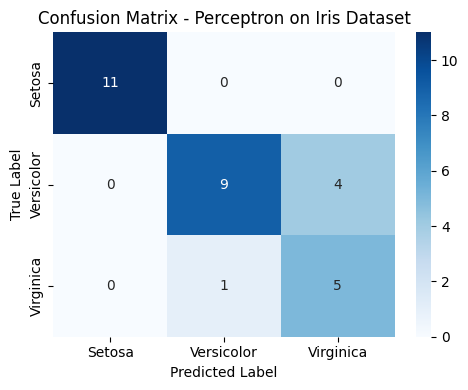

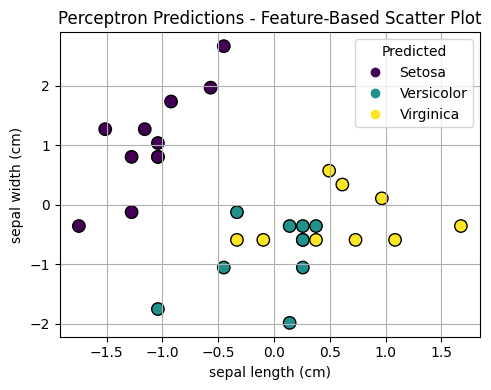

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# 1. Load the Data
iris = datasets.load_iris()

# 2. Get the features and labels from the data
x = iris.data
y = iris.target

# 3. Split the data into training and test data
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 4. Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.transform(X_test)

# 5. Choose Machine Learning algorithm and set the hyperparameters
ppn = Perceptron(max_iter=1000, eta0=0.0001, random_state=0, tol=0.001)

# 6. Train the model
ppn.fit(X_train_std, y_train)

# 7. Make the prediction using the model
y_pred = ppn.predict(X_test_std)

# Mapping numeric labels to flower names
flow_name = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Create a DataFrame with labeled predictions
comparison_df = pd.DataFrame({
    'Prediction': [flow_name[label] for label in y_pred],
    'Actual': [flow_name[label] for label in y_test]
})

print(comparison_df)

#Print summary statistics
wrong_preds = (y_pred != y_test).sum()
total = len(y_test)
print("\nWrong predictions out of total:")
print(f"{wrong_preds} / {total}")

print("\nPercentage accuracy:")
print(f"{100 * accuracy_score(y_test, y_pred):.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Map class labels
labels = ['Setosa', 'Versicolor', 'Virginica']

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Perceptron on Iris Dataset')
plt.tight_layout()
plt.show()

# Visualizing the classification results using a scatter plot

# Use first two features (sepal length and sepal width)
feature1 = 0  # sepal length
feature2 = 1  # sepal width

# Plot the test data points colored by predicted class
plt.figure(figsize=(5, 4))
scatter = plt.scatter(
    X_test_std[:, feature1],
    X_test_std[:, feature2],
    c=y_pred,
    cmap='viridis',
    edgecolor='k',
    s=80
)

# Add axis labels using actual feature names
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.title("Perceptron Predictions - Feature-Based Scatter Plot")
plt.grid(True)

# Add legend manually
legend_labels = ['Setosa', 'Versicolor', 'Virginica']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Predicted")

plt.tight_layout()
plt.show()


